In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import re

In [260]:
df = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')

In [261]:
df.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782


In [262]:
test.head()

,patient_id,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
0,163740,Mirtazapine,"""I&#039;ve tried a few antidepressants over th...",28-Feb-12,22,Depression,10
1,39293,Contrave,"""Contrave combines drugs that were used for al...",5-Mar-17,35,Weight Loss,9
2,208087,Zyclara,"""4 days in on first 2 weeks. Using on arms an...",3-Jul-14,13,Keratosis,4
3,23295,Methadone,"""Ive been on Methadone for over ten years and ...",18-Oct-16,21,Opiate Withdrawal,7
4,97013,Ambien,"""Ditto on rebound sleepless when discontinued....",13-Jan-15,44,Insomnia,2


In [263]:
from sklearn.preprocessing import LabelEncoder, Normalizer

In [264]:
la = LabelEncoder()
la2 = LabelEncoder()

In [265]:
total = df.append(test)
total = total.reset_index(drop=True)
total.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782


In [266]:
total.tail()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
42920,151266,Chantix,Smoking Cessation,"""I took chantix a little over a month. It made...",1,11-Nov-17,2,NaN
42921,139347,Armodafinil,Narcolepsy,"""This medicine kept me from sleeping the whole...",1,30-Sep-14,18,NaN
42922,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43,NaN
42923,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7,NaN
42924,113712,Arthrotec,Sciatica,"""It works!!!""",9,13-Sep-09,46,NaN


In [267]:
total['enc_ucd'] = la.fit_transform(total['use_case_for_drug'])

In [268]:
total['enc_nod'] = la2.fit_transform(total['name_of_drug'])

In [269]:
total.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score,enc_ucd,enc_nod
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969,351,2222
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458,42,980
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969,114,1285
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176,432,352
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782,109,461


In [270]:
total['drug_approved_by_UIC'] = pd.to_datetime(total['drug_approved_by_UIC'])
total.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score,enc_ucd,enc_nod
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,8.022969,351,2222
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,7.858458,42,980
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,6.341969,114,1285
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,6.590176,432,352
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,2015-11-28,43,6.144782,109,461


In [271]:
total['day'] = total['drug_approved_by_UIC'].apply(lambda x: x.day)
total['month'] = total['drug_approved_by_UIC'].apply(lambda x: x.month)
total['year'] = total['drug_approved_by_UIC'].apply(lambda x: x.year)

# Loading Glove

In [207]:
word2vec = {}
with open('glove.6B/glove.6B.50d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vec = np.asarray(values[1:], dtype='float32')
        word2vec[word] = vec

In [208]:
re.sub('[^A-Za-z ]','', total['review_by_patient'].iloc[0])

'It has no side effect I take it in combination of Bystolic  Mg and Fish Oil'

In [209]:
total['review_by_patient'] = total['review_by_patient'].apply(lambda x: re.sub('[^A-Za-z ]','', x.lower()))

In [210]:
def embed(x):
    if len(x.strip())>0:
        return np.mean([word2vec[t] if t in word2vec else word2vec['unk'] for t in x.split()], axis=0)
    else:
        return word2vec['unk']

In [211]:
word2vec['unk']

array([-7.9149e-01,  8.6617e-01,  1.1998e-01,  9.2287e-04,  2.7760e-01,
       -4.9185e-01,  5.0195e-01,  6.0792e-04, -2.5845e-01,  1.7865e-01,
        2.5350e-01,  7.6572e-01,  5.0664e-01,  4.0250e-01, -2.1388e-03,
       -2.8397e-01, -5.0324e-01,  3.0449e-01,  5.1779e-01,  1.5090e-02,
       -3.5031e-01, -1.1278e+00,  3.3253e-01, -3.5250e-01,  4.1326e-02,
        1.0863e+00,  3.3910e-02,  3.3564e-01,  4.9745e-01, -7.0131e-02,
       -1.2192e+00, -4.8512e-01, -3.8512e-02, -1.3554e-01, -1.6380e-01,
        5.2321e-01, -3.1318e-01, -1.6550e-01,  1.1909e-01, -1.5115e-01,
       -1.5621e-01, -6.2655e-01, -6.2336e-01, -4.2150e-01,  4.1873e-01,
       -9.2472e-01,  1.1049e+00, -2.9996e-01, -6.3003e-03,  3.9540e-01],
      dtype=float32)

In [212]:
p = total['review_by_patient'].apply(embed)

In [213]:
p = p.tolist()

In [214]:
word_df = pd.concat([pd.DataFrame(pp.reshape(1,-1)) for pp in p])

In [215]:
word_df = word_df.reset_index(drop=True)
word_df.columns = ['W'+str(i) for i in range(50)]

In [272]:
total.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score,enc_ucd,enc_nod,day,month,year
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,8.022969,351,2222,20,5,2012
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,7.858458,42,980,27,4,2010
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,6.341969,114,1285,14,12,2009
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,6.590176,432,352,27,11,2016
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,2015-11-28,43,6.144782,109,461,28,11,2015


In [273]:
word_df.head()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W40,W41,W42,W43,W44,W45,W46,W47,W48,W49
0,0.338867,0.151582,-0.134316,-0.033280,0.244067,0.257548,-0.136107,-0.092305,0.004897,0.154629,...,-0.071733,0.062432,0.115082,0.002468,0.000193,0.232112,-0.138176,-0.029371,0.029893,0.056202
1,0.296106,0.123664,-0.120597,-0.261748,0.378576,0.108937,-0.547744,0.049032,-0.211283,-0.009563,...,-0.293882,0.151654,-0.082347,0.214961,-0.038723,0.016467,-0.114817,-0.116450,-0.064784,0.052781
2,0.324824,0.069367,-0.110828,-0.155826,0.248719,0.227275,-0.439069,-0.031620,-0.155125,0.069307,...,-0.208693,0.060288,-0.072780,0.183476,-0.028769,0.082628,-0.059834,-0.048578,-0.117167,-0.038305
3,0.308500,0.015693,0.009238,-0.343143,0.316125,0.134812,-0.334616,-0.005505,-0.085090,0.153305,...,-0.172137,0.028023,-0.031343,0.317461,-0.075158,-0.022036,-0.122369,-0.112213,-0.072078,0.078195
4,0.274591,0.126239,0.059301,-0.189832,0.004757,0.094463,-0.091816,-0.026411,-0.099363,0.152300,...,-0.109116,-0.062204,-0.085377,0.219108,0.207803,-0.009340,0.106220,-0.070353,-0.023834,0.129014


In [274]:
from sklearn.decomposition import PCA

In [275]:
pca = PCA(0.95)

In [276]:
pca.fit(word_df)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [277]:
word_df_pca = pd.DataFrame(pca.fit_transform(word_df), columns=['W'+str(i) for i in range(pca.n_components_)])

In [278]:
total = pd.merge(total, word_df_pca, left_index=True, right_index=True)
total.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score,enc_ucd,enc_nod,...,W21,W22,W23,W24,W25,W26,W27,W28,W29,W30
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,8.022969,351,2222,...,-0.011109,-0.133228,0.002972,0.075524,-0.065984,0.013638,0.023444,0.040481,-0.081899,-0.006588
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,7.858458,42,980,...,-0.060839,0.034528,0.015705,-0.045777,0.072385,-0.013371,-0.034805,-0.025296,-0.042443,-0.035001
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,6.341969,114,1285,...,-0.023853,-0.021772,-0.049746,0.081173,-0.017736,-0.027082,0.066483,0.029688,0.021396,0.003286
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,6.590176,432,352,...,-0.021882,-0.003561,0.044280,0.013733,0.032918,0.003070,-0.044393,-0.064059,-0.032546,-0.078391
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,2015-11-28,43,6.144782,109,461,...,-0.038200,0.059808,-0.005235,0.089219,-0.070008,0.088864,-0.009003,0.052557,0.033414,0.100124


In [280]:
train = total[~total['base_score'].isna()].reset_index(drop=True)
test = total[total['base_score'].isna()].reset_index(drop=True)

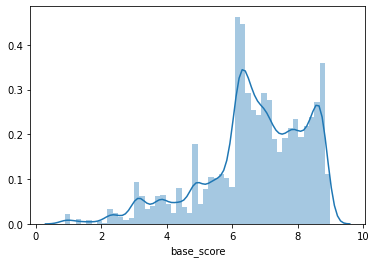

In [281]:
sns.distplot((train['base_score']))

In [282]:
train.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score,enc_ucd,enc_nod,...,W21,W22,W23,W24,W25,W26,W27,W28,W29,W30
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,8.022969,351,2222,...,-0.011109,-0.133228,0.002972,0.075524,-0.065984,0.013638,0.023444,0.040481,-0.081899,-0.006588
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,7.858458,42,980,...,-0.060839,0.034528,0.015705,-0.045777,0.072385,-0.013371,-0.034805,-0.025296,-0.042443,-0.035001
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,6.341969,114,1285,...,-0.023853,-0.021772,-0.049746,0.081173,-0.017736,-0.027082,0.066483,0.029688,0.021396,0.003286
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,6.590176,432,352,...,-0.021882,-0.003561,0.044280,0.013733,0.032918,0.003070,-0.044393,-0.064059,-0.032546,-0.078391
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,2015-11-28,43,6.144782,109,461,...,-0.038200,0.059808,-0.005235,0.089219,-0.070008,0.088864,-0.009003,0.052557,0.033414,0.100124


In [283]:
std = Normalizer()
trcols = ['enc_nod', 'enc_ucd', 'day', 'month', 'year', 'effectiveness_rating','number_of_times_prescribed']+['W'+str(i) for i in range(31)]

In [284]:
X, y = train[trcols], train['base_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [286]:
from sklearn.ensemble import RandomForestRegressor
# from sklearn.naive_bayes import 
import catboost
import lightgbm
import xgboost
import numpy as np

In [287]:
rf = RandomForestRegressor()
cat = catboost.CatBoostRegressor()
cat2 = catboost.CatBoostRegressor()
lgt = lightgbm.LGBMRegressor()

In [288]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((21550, 38), (21550,), (10615, 38), (10615,))

In [289]:
rf.fit(X_train, y_train)
cat.fit(X_train, y_train)
lgt.fit(X_train, y_train)

Learning rate set to 0.067415
0:	learn: 1.5409795	total: 17.4ms	remaining: 17.4s
1:	learn: 1.5015646	total: 32ms	remaining: 15.9s
2:	learn: 1.4494599	total: 47.8ms	remaining: 15.9s
3:	learn: 1.4128813	total: 61.7ms	remaining: 15.4s
4:	learn: 1.3709547	total: 74.1ms	remaining: 14.7s
5:	learn: 1.3316887	total: 88ms	remaining: 14.6s
6:	learn: 1.2942016	total: 102ms	remaining: 14.5s
7:	learn: 1.2658310	total: 118ms	remaining: 14.6s
8:	learn: 1.2343079	total: 132ms	remaining: 14.6s
9:	learn: 1.2070507	total: 146ms	remaining: 14.4s
10:	learn: 1.1824123	total: 160ms	remaining: 14.3s
11:	learn: 1.1597232	total: 172ms	remaining: 14.2s
12:	learn: 1.1380085	total: 186ms	remaining: 14.1s
13:	learn: 1.1196024	total: 198ms	remaining: 13.9s
14:	learn: 1.1029096	total: 209ms	remaining: 13.7s
15:	learn: 1.0875886	total: 222ms	remaining: 13.6s
16:	learn: 1.0710339	total: 234ms	remaining: 13.5s
17:	learn: 1.0590676	total: 246ms	remaining: 13.4s
18:	learn: 1.0418277	total: 260ms	remaining: 13.4s
19:	learn

169:	learn: 0.4545191	total: 2.31s	remaining: 11.3s
170:	learn: 0.4537433	total: 2.33s	remaining: 11.3s
171:	learn: 0.4531491	total: 2.34s	remaining: 11.3s
172:	learn: 0.4497488	total: 2.36s	remaining: 11.3s
173:	learn: 0.4479102	total: 2.37s	remaining: 11.3s
174:	learn: 0.4470024	total: 2.39s	remaining: 11.3s
175:	learn: 0.4459143	total: 2.4s	remaining: 11.3s
176:	learn: 0.4429026	total: 2.42s	remaining: 11.2s
177:	learn: 0.4421705	total: 2.43s	remaining: 11.2s
178:	learn: 0.4411814	total: 2.44s	remaining: 11.2s
179:	learn: 0.4398056	total: 2.45s	remaining: 11.2s
180:	learn: 0.4391577	total: 2.46s	remaining: 11.1s
181:	learn: 0.4356845	total: 2.47s	remaining: 11.1s
182:	learn: 0.4353757	total: 2.49s	remaining: 11.1s
183:	learn: 0.4350957	total: 2.5s	remaining: 11.1s
184:	learn: 0.4332619	total: 2.52s	remaining: 11.1s
185:	learn: 0.4329280	total: 2.53s	remaining: 11.1s
186:	learn: 0.4298580	total: 2.54s	remaining: 11.1s
187:	learn: 0.4282226	total: 2.56s	remaining: 11s
188:	learn: 0.42

341:	learn: 0.2786468	total: 4.63s	remaining: 8.91s
342:	learn: 0.2783624	total: 4.64s	remaining: 8.9s
343:	learn: 0.2772131	total: 4.66s	remaining: 8.89s
344:	learn: 0.2768544	total: 4.68s	remaining: 8.88s
345:	learn: 0.2761333	total: 4.69s	remaining: 8.87s
346:	learn: 0.2750833	total: 4.7s	remaining: 8.85s
347:	learn: 0.2741470	total: 4.71s	remaining: 8.83s
348:	learn: 0.2738049	total: 4.73s	remaining: 8.82s
349:	learn: 0.2731901	total: 4.74s	remaining: 8.81s
350:	learn: 0.2729323	total: 4.76s	remaining: 8.79s
351:	learn: 0.2724500	total: 4.77s	remaining: 8.78s
352:	learn: 0.2716182	total: 4.78s	remaining: 8.76s
353:	learn: 0.2713508	total: 4.79s	remaining: 8.75s
354:	learn: 0.2710927	total: 4.81s	remaining: 8.74s
355:	learn: 0.2708070	total: 4.82s	remaining: 8.72s
356:	learn: 0.2700213	total: 4.83s	remaining: 8.71s
357:	learn: 0.2692557	total: 4.85s	remaining: 8.7s
358:	learn: 0.2689330	total: 4.87s	remaining: 8.69s
359:	learn: 0.2682023	total: 4.88s	remaining: 8.67s
360:	learn: 0.2

510:	learn: 0.1988752	total: 6.94s	remaining: 6.64s
511:	learn: 0.1985142	total: 6.95s	remaining: 6.63s
512:	learn: 0.1982164	total: 6.97s	remaining: 6.61s
513:	learn: 0.1978165	total: 6.98s	remaining: 6.6s
514:	learn: 0.1974364	total: 6.99s	remaining: 6.58s
515:	learn: 0.1969708	total: 7s	remaining: 6.57s
516:	learn: 0.1967068	total: 7.01s	remaining: 6.55s
517:	learn: 0.1965527	total: 7.02s	remaining: 6.53s
518:	learn: 0.1960447	total: 7.03s	remaining: 6.52s
519:	learn: 0.1954915	total: 7.04s	remaining: 6.5s
520:	learn: 0.1951112	total: 7.06s	remaining: 6.49s
521:	learn: 0.1945849	total: 7.07s	remaining: 6.47s
522:	learn: 0.1943913	total: 7.08s	remaining: 6.46s
523:	learn: 0.1940706	total: 7.09s	remaining: 6.45s
524:	learn: 0.1937443	total: 7.11s	remaining: 6.43s
525:	learn: 0.1933802	total: 7.12s	remaining: 6.42s
526:	learn: 0.1929157	total: 7.13s	remaining: 6.4s
527:	learn: 0.1924293	total: 7.15s	remaining: 6.39s
528:	learn: 0.1923167	total: 7.16s	remaining: 6.38s
529:	learn: 0.1918

678:	learn: 0.1541878	total: 9.07s	remaining: 4.29s
679:	learn: 0.1538628	total: 9.08s	remaining: 4.27s
680:	learn: 0.1536833	total: 9.09s	remaining: 4.26s
681:	learn: 0.1533825	total: 9.11s	remaining: 4.25s
682:	learn: 0.1530967	total: 9.12s	remaining: 4.23s
683:	learn: 0.1528982	total: 9.13s	remaining: 4.22s
684:	learn: 0.1527289	total: 9.15s	remaining: 4.21s
685:	learn: 0.1525008	total: 9.16s	remaining: 4.19s
686:	learn: 0.1524676	total: 9.17s	remaining: 4.18s
687:	learn: 0.1522320	total: 9.18s	remaining: 4.16s
688:	learn: 0.1519014	total: 9.2s	remaining: 4.15s
689:	learn: 0.1515880	total: 9.21s	remaining: 4.14s
690:	learn: 0.1515245	total: 9.22s	remaining: 4.12s
691:	learn: 0.1512727	total: 9.23s	remaining: 4.11s
692:	learn: 0.1511590	total: 9.24s	remaining: 4.09s
693:	learn: 0.1510229	total: 9.25s	remaining: 4.08s
694:	learn: 0.1508157	total: 9.26s	remaining: 4.07s
695:	learn: 0.1504948	total: 9.28s	remaining: 4.05s
696:	learn: 0.1502221	total: 9.29s	remaining: 4.04s
697:	learn: 0

850:	learn: 0.1230284	total: 11.2s	remaining: 1.96s
851:	learn: 0.1229827	total: 11.2s	remaining: 1.95s
852:	learn: 0.1228129	total: 11.2s	remaining: 1.93s
853:	learn: 0.1227317	total: 11.2s	remaining: 1.92s
854:	learn: 0.1225393	total: 11.2s	remaining: 1.91s
855:	learn: 0.1223490	total: 11.3s	remaining: 1.89s
856:	learn: 0.1221599	total: 11.3s	remaining: 1.88s
857:	learn: 0.1219662	total: 11.3s	remaining: 1.87s
858:	learn: 0.1217613	total: 11.3s	remaining: 1.85s
859:	learn: 0.1215213	total: 11.3s	remaining: 1.84s
860:	learn: 0.1214587	total: 11.3s	remaining: 1.83s
861:	learn: 0.1212567	total: 11.3s	remaining: 1.81s
862:	learn: 0.1212043	total: 11.3s	remaining: 1.8s
863:	learn: 0.1211652	total: 11.4s	remaining: 1.79s
864:	learn: 0.1211315	total: 11.4s	remaining: 1.77s
865:	learn: 0.1209709	total: 11.4s	remaining: 1.76s
866:	learn: 0.1207533	total: 11.4s	remaining: 1.75s
867:	learn: 0.1205404	total: 11.4s	remaining: 1.73s
868:	learn: 0.1203536	total: 11.4s	remaining: 1.72s
869:	learn: 0

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [290]:
rf_test = (rf.predict((X_test)))

In [291]:
cat_test = (cat.predict((X_test)))

In [292]:
lgt_test = (lgt.predict((X_test)))

In [293]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [294]:
def scoring(y_actual, y_predicted):
    rmse = sqrt(mean_squared_error(y_actual, y_predicted))
    score = 100*max(0, 1-rmse)
    return score

In [295]:
scoring(y_test, rf_test)

64.45634814177929

In [296]:
scoring(y_test, cat_test)

83.65210419795204

In [297]:
scoring(y_test, lgt_test)

78.81599510175867

In [83]:
test_pred = cat.predict(test[['enc_nod', 'enc_ucd', 'day', 'month', 'year', 'effectiveness_rating', 'number_of_times_prescribed']])

In [84]:
test['base_score'] = test_pred

In [85]:
test[['patient_id', 'base_score']].to_csv('pred_cat_boost_w_date.csv', index=False)

# Stacking

In [252]:
from mlxtend.regressor import StackingCVRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from scipy.stats import uniform


rf = RandomForestRegressor()
cat = catboost.CatBoostRegressor()
cat2 = catboost.CatBoostRegressor()
lgt = lightgbm.LGBMRegressor()

stack = StackingCVRegressor(regressors=(rf, cat, lgt),
                            meta_regressor=cat2, 
                            random_state=42,
                            use_features_in_secondary=True)

In [239]:
## RF HYP

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

## LGBM HYP

param_test ={'num_leaves': range(6,50) 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [240]:
# stack.get_params()

In [ ]:
grid = GridSearchCV(
    estimator=stack,
    param_grid={
        'randomforestregressor__n_estimators': n_estimators,
        'randomforestregressor__max_features': max_features,
        'randomforestregressor__max_depth': max_depth,
        'randomforestregressor__min_samples_split': min_samples_split,
        'randomforestregressor__min_samples_leaf': min_samples_leaf,
        'randomforestregressor__bootstrap': bootstrap,
        'lgbmregressor__num_leaves': range(6, 50), 
        'lgbmregressor__min_child_samples': range(100, 500)
#         'lgbmregressor__min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
#         'lgbmregressor__subsample': uniform(loc=0.4, scale=0.6).rvs(10),
#         'lgbmregressor__colsample_bytree': uniform(loc=0.4, scale=0.6).rvs(10),
#         'lgbmregressor__reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
#         'lgbmregressor__reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]
#         'catboostregressor__learning_rate': [0.03, 0.1],
#         'catboostregressor__depth': [4, 6, 10],
#         'catboostregressor__l2_leaf_reg': [1, 3, 5, 7, 9],
#         'meta_regressor__learning_rate': [0.03, 0.1],
#         'meta_regressor__depth': [4, 6, 10],
#         'meta_regressor__l2_leaf_reg': [1, 3, 5, 7, 9]
    },
    cv=5,
    refit=True,
)

grid.fit(X, y)

print("Best: %f using %s" % (grid.best_score_, grid.best_params_))

In [94]:
y_pred = grid.predict(X_test)

In [95]:
scoring(y_test, y_pred)

90.35615691254361

In [96]:
test_pred = stack.predict(test[['enc_nod', 'enc_ucd', 'day', 'month', 'year', 'effectiveness_rating', 'number_of_times_prescribed']])

In [97]:
test['base_score'] = test_pred
test[['patient_id', 'base_score']].to_csv('stacked_regress_w_date.csv', index=False)

In [249]:
a=sp_randint(6, 50)
ra

In [258]:
uniform(loc=0.4, scale=0.6).rvs(10)

array([0.87875796, 0.52777838, 0.83563391, 0.71512782, 0.69014448,
       0.47736856, 0.8455475 , 0.82674839, 0.78163887, 0.92599426])

In [256]:
uniform?